# Results

Compare between drugs.
* Which are frequently used
* What age range

During the analysis it was found that the data was not very precise or consistent as some results were interpretted during updating the document and changing the survey codes. Usually during the analysis, such results are excluded. 

In [3]:
#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

In [4]:
#data is a tsv file therefore read it as a csv file with \t as the seperator
dataset = pd.read_csv('data/drugs-dataset.tsv', delimiter = '\t')


In [5]:
case_quest_data = dataset.ix[:,0:2].copy()
tabacco = dataset.ix[:,'CIGEVER':'PIPE30DY'].copy() # tabacco dataset
alcohol = dataset.ix[:,'ALCEVER':'DR5DAY'].copy() # alcohol dataset
cocaine = dataset.ix[:,'COCEVER':'CC30EST'].copy() # cocaine dataset
crack = dataset.ix[:,'CRKEVER':'CR30EST'].copy() # crack dataset
marijuana = dataset.ix[:,'MJEVER':'MR30EST'].copy() # marijuana dataset
heroin = dataset.ix[:,'HEREVER':'HR30EST'].copy() # heroin dataset
hallucinogens = dataset.ix[:,'LSD':'ECSREC'].copy() # hallucinogens dataset
inhalants = dataset.ix[:,'AMYLNIT':'IN30EST'].copy() # inhalants dataset
pain_relievers = dataset.ix[:,'DARVTYLC':'OXDAYPWK'].copy() # pain_relievers dataset
tranquilizers = dataset.ix[:,'KLONOPIN':'TRDAYPWK'].copy() # tranquilizers dataset
stimulants = dataset.ix[:,'METHDES':'MTDAYPWK'].copy() # stimulants dataset
sedatives = dataset.ix[:,'METHAQ':'SVDAYPWK'].copy() # sedatives dataset

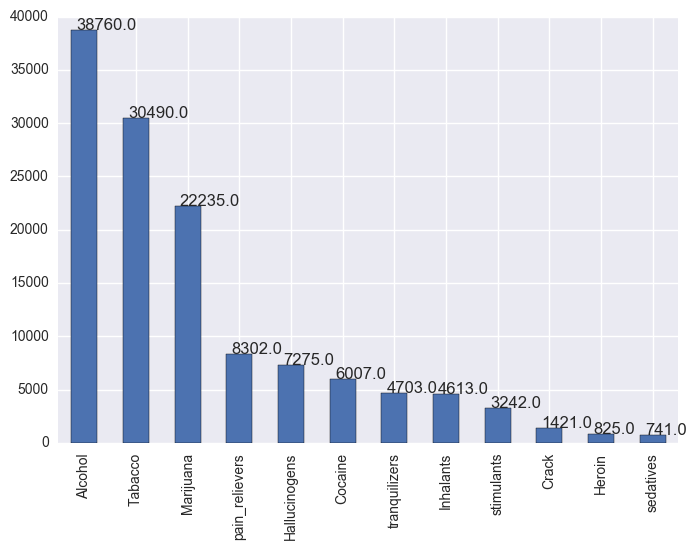

In [6]:
Num_Tabacco=tabacco.query('(CIGEVER==1)|(SNFEVER==1)|(CIGAREVR==1)').shape[0]
Num_Alcohol=alcohol.query('ALCEVER==1').shape[0]
Num_cocaine=cocaine.query('COCEVER==1').shape[0]
Num_crack=crack.query('CRKEVER==1').shape[0]
Num_marijuana=marijuana.query('MJEVER==1').shape[0]
Num_heroin=heroin.query('HEREVER==1').shape[0]
Num_Hallucinogens=hallucinogens.query('(LSD ==1)|(PSILCY ==1)|(ECSTASY ==1)|(HALNOLST ==1)|(MESC ==1)|(PCP ==1)|(PEYOTE ==1)').shape[0]
Num_Inhalants=inhalants.query('(AMYLNIT ==1)|(CLEFLU==1)|(GAS ==1)|(GLUE ==1)|(ETHER ==1)|(SOLVENT ==1)|(LGAS ==1)|(NITOXID ==1)|(SPPAINT ==1)|(AEROS ==1)|(INHNOLST==1)').shape[0]
Num_STI=stimulants.query('(METHDES ==1)|(DIETPILS ==1)|(RITMPHEN ==1)|(STMCARD ==1)').shape[0]
Num_SED=sedatives.query('(METHAQ ==1)|(NEMBBARB ==1)|(RESTTMAZ ==1)|(SEDCARD ==1)').shape[0]
Num_PR=pain_relievers.query('(ANLCARD ==1)|(VICOLOR ==1)|(PERCTYLX ==1)|(DARVTYLC ==1)').shape[0]
Num_tranquilizers=tranquilizers.query('(KLONOPIN ==1)|(XNAXATVN ==1)|(VALMDIAZ ==1)|(TRNCARD ==1)').shape[0]

Num__AllDrugs ={"Num":{"Tabacco":Num_Tabacco,"Alcohol":Num_Alcohol,"Cocaine":Num_cocaine,"Crack":Num_crack,"Marijuana":Num_marijuana,"Heroin":Num_heroin,"Hallucinogens":Num_Hallucinogens,"Inhalants":Num_Inhalants,"stimulants":Num_STI,"sedatives":Num_SED,"pain_relievers":Num_PR,"tranquilizers":Num_tranquilizers}}
DF_Num__AllDrugs=pd.DataFrame(Num__AllDrugs).sort_values('Num', ascending = False)

ax= DF_Num__AllDrugs['Num'].plot.bar()
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.1 , p.get_height()+50))

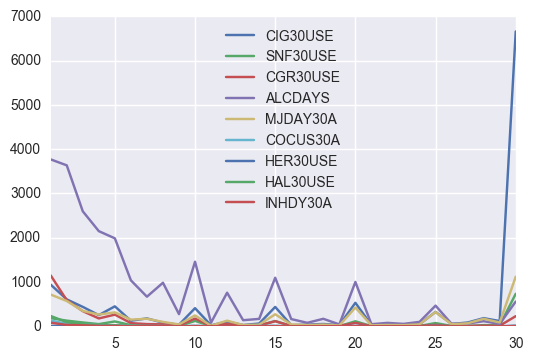

In [10]:
trial = dataset.ix[:, ['CIG30USE', 'SNF30USE', 'CGR30USE', 'ALCDAYS']].copy()
usage = dataset.ix[(dataset['CIG30USE'] < 31) | (dataset['SNF30USE'] < 31) | (dataset['CGR30USE'] < 31)
                  | (dataset['ALCDAYS'] < 31)
                  | (dataset['MJDAY30A'] < 31)
                  | (dataset['COCUS30A'] < 31)
                  | (dataset['HER30USE'] < 31)
                  | (dataset['HAL30USE'] < 31)
                  | (dataset['INHDY30A'] < 31)].copy()
count_cig = usage.groupby('CIG30USE').agg({ 'CIG30USE': 'count'})
count_snf = usage.groupby('SNF30USE').agg({ 'SNF30USE': 'count'})
count_cgr = usage.groupby('CGR30USE').agg({ 'CGR30USE': 'count'})
count_alc = usage.groupby('ALCDAYS').agg({ 'ALCDAYS': 'count'})
count_mj = usage.groupby('MJDAY30A').agg({ 'MJDAY30A': 'count'})
count_co = usage.groupby('COCUS30A').agg({ 'COCUS30A': 'count'})
count_her = usage.groupby('HER30USE').agg({ 'HER30USE': 'count'})
count_hal = usage.groupby('HAL30USE').agg({ 'HAL30USE': 'count'})
count_inh = usage.groupby('INHDY30A').agg({ 'INHDY30A': 'count'})

usage_count = pd.concat([count_cig, count_snf,count_cgr,count_alc,count_mj,count_co,count_her,count_hal,count_inh], axis=1)
usage_count = usage_count.fillna(0)


usage_count[0:30].plot()


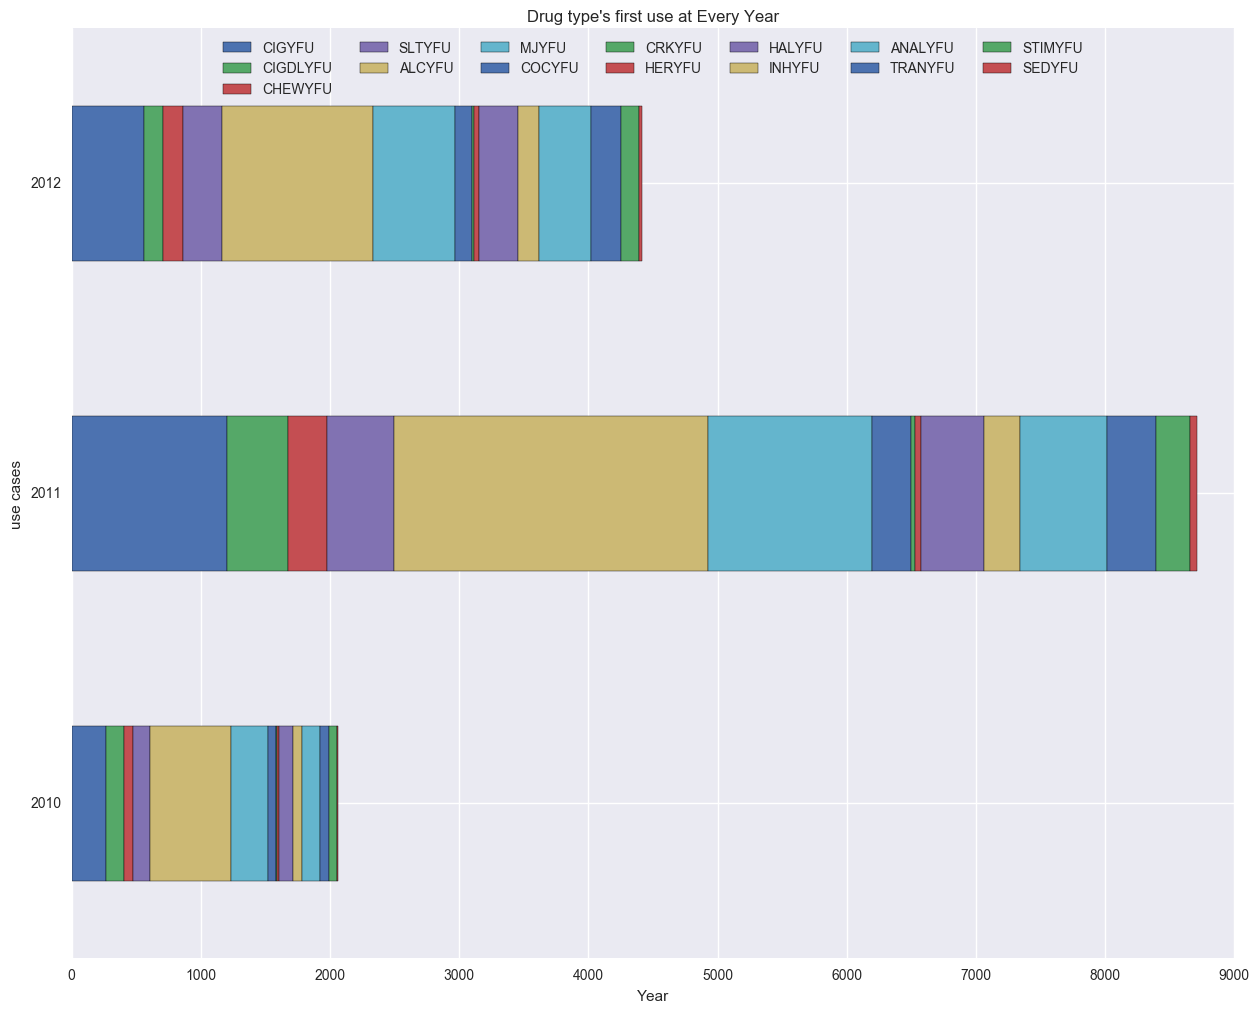

In [20]:


fitstyearofuse = dataset.ix[(dataset['CIGYFU'] < 2013) | (dataset['CIGDLYFU'] < 2103) | (dataset['SNUFYFU'] < 2013)
                  | (dataset['CHEWYFU'] < 2013)
                  | (dataset['SLTYFU'] < 2013)
                  | (dataset['ALCYFU'] < 2013)
                  | (dataset['MJYFU'] < 2013)
                  | (dataset['COCYFU'] < 2013)
                  | (dataset['CRKYFU'] < 2013)
                  | (dataset['HERYFU'] < 2013)
                  | (dataset['HALYFU'] < 2013)
                  | (dataset['INHYFU'] < 2013)
                  | (dataset['ANALYFU'] < 2013)
                  | (dataset['TRANYFU'] < 2013)
                  | (dataset['STIMYFU'] < 2013)
                  | (dataset['SEDYFU'] < 2013)].copy()

fitstyearofuse_cig = fitstyearofuse.groupby('CIGYFU').agg({ 'CIGYFU': 'count'})
fitstyearofuse_sigdl = fitstyearofuse.groupby('CIGDLYFU').agg({ 'CIGDLYFU': 'count'})
fitstyearofuse_chew = fitstyearofuse.groupby('CHEWYFU').agg({ 'CHEWYFU': 'count'})
fitstyearofuse_slt = fitstyearofuse.groupby('SLTYFU').agg({ 'SLTYFU': 'count'})
fitstyearofuse_acl = fitstyearofuse.groupby('ALCYFU').agg({ 'ALCYFU': 'count'})
fitstyearofuse_mj = fitstyearofuse.groupby('MJYFU').agg({ 'MJYFU': 'count'})
fitstyearofuse_coc = fitstyearofuse.groupby('COCYFU').agg({ 'COCYFU': 'count'})
fitstyearofuse_crk = fitstyearofuse.groupby('CRKYFU').agg({ 'CRKYFU': 'count'})
fitstyearofuse_her = fitstyearofuse.groupby('HERYFU').agg({ 'HERYFU': 'count'})
fitstyearofuse_hal = fitstyearofuse.groupby('HALYFU').agg({ 'HALYFU': 'count'})
fitstyearofuse_inh = fitstyearofuse.groupby('INHYFU').agg({ 'INHYFU': 'count'})
fitstyearofuse_pr = fitstyearofuse.groupby('ANALYFU').agg({ 'ANALYFU': 'count'})
fitstyearofuse_tran = fitstyearofuse.groupby('TRANYFU').agg({ 'TRANYFU': 'count'})
fitstyearofuse_stim = fitstyearofuse.groupby('STIMYFU').agg({ 'STIMYFU': 'count'})
fitstyearofuse_sed = fitstyearofuse.groupby('SEDYFU').agg({ 'SEDYFU': 'count'})


fitstyearofuse_count = pd.concat([fitstyearofuse_cig, fitstyearofuse_sigdl,fitstyearofuse_chew,fitstyearofuse_slt,fitstyearofuse_acl,fitstyearofuse_mj,fitstyearofuse_coc,fitstyearofuse_crk,fitstyearofuse_her,fitstyearofuse_hal,fitstyearofuse_inh,fitstyearofuse_pr,fitstyearofuse_tran,fitstyearofuse_stim,fitstyearofuse_sed], axis=1)
fitstyearofuse_count = fitstyearofuse_count.fillna(0)
fitstyearofuse_count

my_plot = fitstyearofuse_count[0:3].plot(kind='barh',stacked=True,title="Drug type's first use at Every Year",figsize=(15, 12))
my_plot.set_xlabel("Year")
my_plot.set_ylabel("use cases")
my_plot.legend(loc=9,ncol=7)

In [7]:
#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from IPython.html.widgets import interact, interact_manual
from IPython.html import widgets
from IPython.display import display

C:\Users\靜儀\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [29]:

#data is a tsv file therefore read it as a csv file with \t as the seperator
dataset = pd.read_csv('data/drugs-dataset.tsv', delimiter = '\t')
dataset_All = dataset.ix[:, ['CASEID', 'QUESTID2', 'ALCEVER', 'ALCDAYS', 'ALCTRY', 'MJEVER', 'MJDAY30A', 'MJAGE', 'CIGEVER', 'CIG30USE', 'CIGTRY', 'SNFEVER', 'SNF30USE', 'SNUFTRY', 'CIGAREVR', 'CGR30USE', 'CIGARTRY']].copy()
dataset_All['ALCTRY'] = dataset_All.ix[dataset_All['ALCTRY']<90, 'ALCTRY']
dataset_All['MJAGE'] = dataset_All.ix[dataset_All['MJAGE']<90, 'MJAGE']
dataset_All['CIGTRY'] = dataset_All.ix[dataset_All['CIGTRY']<90, 'CIGTRY']
dataset_All['SNUFTRY'] = dataset_All.ix[dataset_All['SNUFTRY']<90, 'SNUFTRY']
dataset_All['CIGARTRY'] = dataset_All.ix[dataset_All['CIGARTRY']<90, 'CIGARTRY']
#dataset_All = dataset_All.fillna(0) (skip na value)

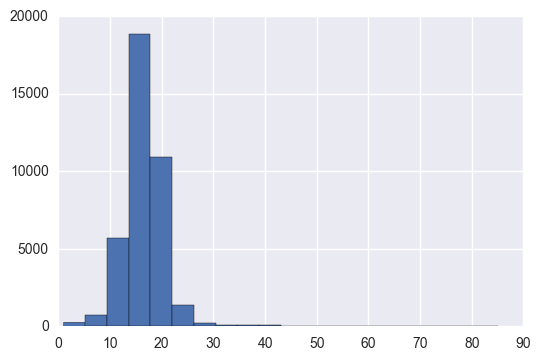

In [27]:
@interact(Drug=['Alcohol', 'Tabacco Cigarettes', 'Tabacco Snuff', 'Tabacco Cigar','Marijuana'],bins=(5,30,5))
def show_distplot(Drug,bins):
    if Drug == 'Alcohol':
        x = 'ALCTRY'
    else:
        if Drug == 'Tabacco Cigarettes':
            x = 'CIGTRY'
        else:
            if Drug == 'Tabacco Snuff':
                x = 'SNUFTRY'
            else:
                if Drug == 'Tabacco Cigar':
                    x = 'CIGARTRY'
                else:
                    if Drug == 'Marijuana':
                        x = 'MJAGE'
    dataset_All[x].hist(bins=bins)

    
    

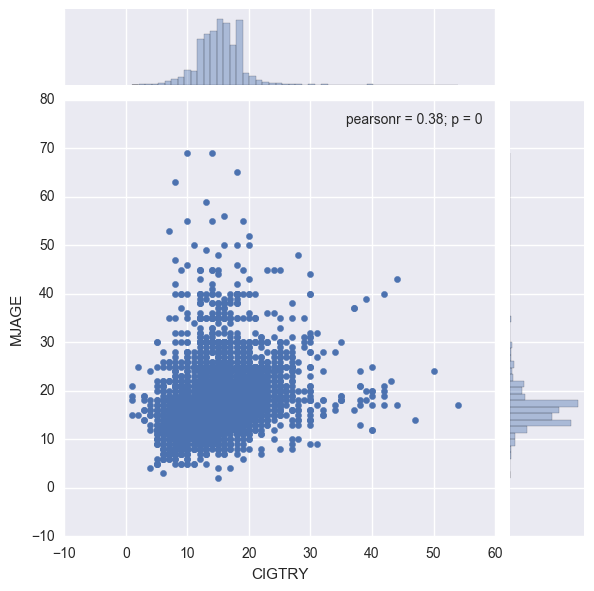

In [28]:
@interact(Drug1=['Alcohol', 'Tabacco Cigarettes', 'Tabacco Snuff', 'Tabacco Cigar','Marijuana'],Drug2=['Alcohol','Tabacco Cigarettes', 'Tabacco Snuff', 'Tabacco Cigar','Marijuana'])
def show_distplot(Drug1,Drug2):
    if Drug1 == 'Alcohol':
        x = 'ALCTRY'
    else:
        if Drug1 == 'Tabacco Cigarettes':
            x = 'CIGTRY'
        else:
            if Drug1 == 'Tabacco Snuff':
                x = 'SNUFTRY'
            else:
                if Drug1 == 'Tabacco Cigar':
                    x = 'CIGARTRY'
                else:
                    if Drug1 == 'Marijuana':
                        x = 'MJAGE'
                
    if Drug2 == 'Alcohol':
        y = 'ALCTRY'
    else:
        if Drug2 == 'Tabacco Cigarettes':
            y = 'CIGTRY'
        else:
            if Drug2 == 'Tabacco Snuff':
                y = 'SNUFTRY'
            else:
                if Drug2 == 'Tabacco Cigar':
                    y = 'CIGARTRY'
                else:
                    if Drug2 == 'Marijuana':
                        y = 'MJAGE'
                
    sns.jointplot(x=dataset_All[x],y=dataset_All[y])

## Next

[Clustering](Clustering.ipynb)